<a href="https://colab.research.google.com/github/lakshmi-keerthi/MLPractice/blob/main/Literacy_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of this experiment, you will be able to:

* Perform Data preprocessing

## Dataset

### Description

We will be using district wise demographics, enrollments, school and teacher indicator data to predict whether the literacy rate is high / medium / low in each district.

### Data Preprocessing

Data preprocessing is an important step of solving every machine learning problem. Most of
the datasets used with Machine Learning problems need to be processed / cleaned / transformed
so that a Machine Learning algorithm can be trained on it.

There are different steps involved for Data Preprocessing. These steps are as follows:

    1. Data Cleaning → In this step the primary focus is on
        -Handling missing data
        -Handling nosiy data
        -Detection and removal of outliers
    
    2. Data Integration → This process is used when data is gathered from various data sources
    and data are combined to form consistent data. This data after performing cleaning is used
    for analysis.
    
    3. Data Transformation → In this step we will convert the raw data into a specified for-
    mat according to the need of the model we are building. There are many options used for
    transforming the data as below:
        -Normalization
        -Aggregation
        -Generalization
        
    4. Data Reduction → After data transformation and scaling the redundancy within the data
    is removed and efficiently organizing the data is performed.



### Total Marks  = 20

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "2001381" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8885332495" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook="M0_Mini_Hackathon_Data_Munging" #name of the notebook
Answer = "This notebook is evaluated by mentors during the lab"


def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/data-20190108T113429Z-001.zip")
    ipython.magic("sx unzip data-20190108T113429Z-001.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getInclassSupport() and getOnlineSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Inclass_support,
              "feedback_online_mentor" : Online_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if Additional: return Additional
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getInclassSupport():
  try:
    return Inclass_support
  except NameError:
    print ("Please answer Inclass support Question")
    return None


def getOnlineSupport():
  try:
    return Online_support
  except NameError:
    print ("Please answer Online support Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))

else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [ ]:
!ls

data
data-20190108T113429Z-001.zip
Districtwise_Basicdata.csv
Districtwise_Enrollment_details_indicator.csv
Districtwise_SchoolData.csv
Districtwise_Teacher_indicator.csv
M0_Mini_Hackathon_Data_Munging.ipynb


In [ ]:
%cd data

/content/data/data


In [ ]:
!ls

Districtwise_Basicdata.csv
Districtwise_Enrollment_details_indicator.csv
Districtwise_SchoolData.csv
Districtwise_Teacher_indicator.csv


#### Exercise 1 - (2 Marks)
We have four different files

* Districtwise_Basicdata.csv
* Districtwise_Enrollment_details_indicator.csv
* Districtwise_SchoolData.csv
* Districtwise_Teacher_indicator.csv
These files contain the neccesary data to solve the problem.
Load all the files correctly, after observing the header level details, data records etc

Hint : Use read_csv from pandas

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Your Code Here
EnrollmentDetails = pd.read_csv("Districtwise_Enrollment_details_indicator.csv", header = 3)
BasicData = pd.read_csv("Districtwise_Basicdata.csv", header=1)
SchoolData = pd.read_csv("Districtwise_SchoolData.csv", header = 3)
TeacherData = pd.read_csv("Districtwise_Teacher_indicator.csv", header = 3)
#!cat Districtwise_Enrollment_details_indicator.csv
BasicData.head(5)

,Year,Statecd,statename,distcd,distname,blocks,clusters,villages,totschools,totpopulation,p_06_pop,p_urb_pop,sexratio,sexratio_06,growthrate,p_sc_pop,p_st_pop,overall_lit,female_lit
0,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3501,ANDAMANS ...,3,16,83,212,237586.0,23616.05,55.89,874.0,980.0,13.97,0.00,1.72,High,84.52
1,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3503,MIDDLE AND NORTH ANDAMANS ...,3,13,76,181,105539.0,11651.51,2.60,925.0,975.0,-0.07,0.00,0.72,High,79.39
2,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3502,NICOBARS ...,3,8,42,58,36819.0,4226.82,0.00,778.0,961.0,-12.48,0.00,64.28,High,70.70
3,2012-13,28,ANDHRA PRADESH ...,2801,ADILABAD ...,52,356,1576,4983,2737738.0,295675.70,27.68,1003.0,942.0,10.04,17.82,18.09,Low,51.99
4,2012-13,28,ANDHRA PRADESH ...,2822,ANANTAPUR ...,63,564,929,5188,4083315.0,427114.75,28.09,977.0,927.0,12.16,14.29,3.78,Low,54.31


#### Exercise 2  - (4 Marks)

* Remove the unwanted columns, which are unlikely to contribute for the prediction of overall literacy grade. The decision of what constitutes unwanted columns depends on how it effects your final accuracy (and very little on your domain understanding of education sector in India; you're encouraged however to exercise some domain understanding too if you wish)

**Hint** use pandas drop function to drop your choice of unwanted columns (if any).


* As the required data is present in different files, we need to integrate all the four to make single dataframe/dataset. For that purpose, create a unique identifier for each row in all the dataframes so that it can be used to map the data in different files correctly
* Join/integrate this data

Example : data of the district ananthapur in Andrapradesh, which present in different files should form a single row

Hint :
* Use the combination of year, statecode, district code as unique identifier

* Refer the following link for merge, join and concat syntaxes:  

https://pandas.pydata.org/pandas-docs/stable/merging.html


In [ ]:
# YOUR CODE HERE
ed = pd.DataFrame(EnrollmentDetails)
bd = pd.DataFrame(BasicData)
sd = pd.DataFrame(SchoolData)
ti = pd.DataFrame(TeacherData)
sd = sd.rename(columns = {"ac_year" : "Year"})
ti = ti.rename(columns = {"ac_year" : "Year","statecd":"Statecd"})
bd = bd.drop(columns=['blocks', 'clusters', 'villages'])
bd = bd.drop(columns=['statename', 'distname'])
ed = ed.drop(ed.loc[:, 'Enr Dis B C1':'Enr Dis G C8'], axis = 1)
ed = ed.drop(ed.loc[:, 'Gerp Py2':'Nerup Cy'], axis = 1)
ed = ed.drop(ed.loc[:, 'Enr Py4 C1':'Enr Py1 C8'], axis = 1)
ed = ed.drop(columns=['State Name ', 'distname'])
sd = sd.drop(sd.loc[:, 'Sch Since 2003 1':'Kitshed7'], axis = 1)
sd = sd.drop(sd.loc[:, 'Cls Minor1':'Cls Minor'], axis = 1)
sd = sd.drop(sd.loc[:, 'Mdm 1':'Mdm 7'], axis = 1)
sd = sd.drop(columns=['State Name ', 'distname'])
ti = ti.drop(columns=['statename', 'distname'])
bded = pd.merge(ed,bd,how='right',on=['Year','Statecd','distcd'])
bdedsd = pd.merge(bded,sd,how='right',on=['Year','Statecd','distcd'])
final = pd.merge(bdedsd,ti,how='right',on=['Year','Statecd','distcd'])
#final = final.loc[:,~final.columns.duplicated()]
final.shape
#final.columns
#frame = [bd,ed,sd,td]
#result = pd.concat(frame, keys=[0, 1, 3],sort=False)
#result

(1324, 502)

Follow this steps in order to clean the data:

#### Exercise 3 - (3 Marks)

* Overall_lit is our target variable, which we need to predict. Delete the row with missing overall_lit column
* Take a call to replace the missing values in any other column appropriately with mean/median/mode
* Convert categorical values to numerical values
Example : If a feature contains categorical values such as dog, cat, mouse etc then replace them with 1, 2, 3 etc or using one hot encoding (your judgement)

*Hint* :
* Use pandas fillna function to replace the missing values

In [ ]:
# YOUR CODE HERE
final = final.dropna(axis=0, subset=['overall_lit'])

In [ ]:
def yearConvertor(year):
  if year == "2012-13":
    return 1
  return 2
def targetConvertor(target):
  if target == "High":
    return 2
  if target == "Low":
    return 0
  return 1

In [ ]:
final["Year"] = final["Year"].apply(yearConvertor)
final["overall_lit"] = final["overall_lit"].apply(targetConvertor)

In [ ]:
final

,Year,Statecd,distcd,Enr Govt1,Enr Govt2,Enr Govt3,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Govt9,Enr Pvt1,Enr Pvt2,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt3,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Govt9,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt4,Enr R Pvt5,Enr R Pvt6,Enr R Pvt7,Enr R Pvt9,Enr Cy C1,Enr Cy C2,Enr Cy C3,Enr Cy C4,Enr Cy C5,...,tch_sc_m7,tch_sc_f1,tch_sc_f2,tch_sc_f3,tch_sc_f4,tch_sc_f5,tch_sc_f6,tch_sc_f7,tch_st_m1,tch_st_m2,tch_st_m3,tch_st_m4,tch_st_m5,tch_st_m6,tch_st_m7,tch_st_f1,tch_st_f2,tch_st_f3,tch_st_f4,tch_st_f5,tch_st_f6,tch_st_f7,trn_tch_m1,trn_tch_m2,trn_tch_m3,trn_tch_m4,trn_tch_m5,trn_tch_m6,trn_tch_m7,trn_tch_f1,trn_tch_f2,trn_tch_f3,trn_tch_f4,trn_tch_f5,trn_tch_f6,trn_tch_f7,prof_trn_tch_r,prof_trn_tch_p,days_nontch,tch_nontch
0,1,35,3501,3232,3359.0,10620,0.0,1027,3739.0,0,0.0,2058.0,1994.0,5408.0,0,0.0,1153.0,0.0,0.0,1788,3030,4236,0.0,169,1750,0,0.0,1193,1113,2206,0,0,846,0,0.0,4061,3914,3936,4047,4073,...,0,0,0,1,0,0,0,0,4,3,16,0,0,8,0,11,5,18,0,1,11,0,69,97,64,0,14,66,0,134,176,135,0,22,103,0,2968,228,12,519
1,1,35,3503,3996,3808.0,1162,1043.0,1397,1625.0,0,0.0,779.0,295.0,NaN,0,0.0,225.0,0.0,0.0,3996,3808,1162,1043.0,1397,1625,0,0.0,779,295,0,0,0,225,0,0.0,1742,1954,1890,1920,1957,...,0,1,1,0,0,0,0,0,0,1,6,2,7,0,0,2,2,3,0,4,2,0,126,79,32,8,45,37,0,84,85,40,3,28,60,0,1249,203,8,362
2,1,35,3502,1510,886.0,357,0.0,651,838.0,0,0.0,16.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1510,886,357,NaN,651,838,0,NaN,16,0,0,0,0,0,0,0.0,625,618,488,532,476,...,0,0,0,0,0,0,0,0,33,29,18,0,27,27,0,53,32,16,0,28,40,0,36,25,18,0,22,31,0,58,29,23,0,17,46,0,430,78,20,28
3,1,28,2801,135664,53374.0,1266,0.0,226,23850.0,59120,0.0,57987.0,45282.0,0.0,0,0.0,8169.0,34569.0,0.0,125503,50606,948,0.0,0,21341,50685,0.0,28423,29291,0,0,0,5026,14613,0.0,65876,61660,57168,53878,51002,...,621,401,252,4,0,0,37,294,1447,394,1,0,1,409,260,288,126,1,0,0,187,146,1964,554,0,0,0,46,641,830,267,0,0,0,8,248,16419,845,13,263
4,1,28,2822,145256,71562.0,6867,870.0,92640,325.0,5271,0.0,78173.0,50979.0,1704.0,0,41617.0,507.0,6684.0,0.0,127573,62797,6060,870.0,74436,325,4756,0.0,34449,30406,1182,0,16744,198,1850,0.0,68004,67460,66925,64828,62220,...,1,457,236,12,0,444,1,4,281,143,5,0,210,0,3,136,69,3,0,139,0,0,2521,1161,2,0,1226,0,10,1652,726,0,0,591,0,3,21487,676,14,1185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,2,19,1919,301409,822.0,1625,39738.0,245498,204.0,78053,0.0,44571.0,6397.0,3475.0,1096,1619.0,1801.0,1209.0,0.0,284182,741,99,39733.0,221709,204,74673,0.0,38408,5103,1650,1096,1619,1632,1209,0.0,71284,97531,92479,92922,94931,...,361,1050,8,10,31,358,0,278,351,1,1,4,294,0,87,136,1,2,5,69,0,70,1865,13,0,118,78,0,104,1732,2,0,25,38,0,44,18182,742,17,1615
1320,2,19,1914,238869,277.0,2856,40858.0,149666,0.0,23868,0.0,11852.0,4090.0,3602.0,433,183.0,360.0,0.0,0.0,229126,42,1766,40106.0,137706,0,23581,0.0,9669,3920,2942,433,183,360,0,0.0,32632,95935,71800,65007,60255,...,140,343,4,7,39,212,0,50,1123,30,8,59,254,1,66,340,6,8,21,45,0,10,2037,0,0,27,30,0,21,633,0,0,6,9,0,12,9173,290,11,878
1321,2,19,1921,70564,0.0,3640,9244.0,56712,0.0,5290,0.0,49141.0,11709.0,5298.0,436,5200.0,5103.0,2498.0,0.0,53652,0,3640,9244.0,33560,0,3634,0.0,34096,8167,4614,0,2868,3926,1626,0.0,37444,35504,32368,32138,25463,...,25,703,17,18,12,182,10,16,192,24,9,8,75,1,16,357,40,12,10,71,14,11,311,0,0,6,8,0,12,134,0,0,0,19,0,4,2576,122,13,108
1322,2,19,1918,549018,4662.0,498,57748.0,367563,428.0,121874,0.0,64252.0,9670.0,4449.0,2713,733.0,1865.0,2164.0,0.0,510676,4662,498,55228.0,319326,428,108513,0.0,55656,6836,3911,2579,0,939,1289,0.0,110658,190130,175587,163634,161871,...,548,3045,52,10,68,938,2,364,432,7,9,14,259,0,106,246,5,0

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'median')
imputer.fit(final)
imputer.transform(final)
final = pd.DataFrame(imputer.transform(final),columns = final.columns)
final

,Year,Statecd,distcd,Enr Govt1,Enr Govt2,Enr Govt3,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Govt9,Enr Pvt1,Enr Pvt2,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt3,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Govt9,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt4,Enr R Pvt5,Enr R Pvt6,Enr R Pvt7,Enr R Pvt9,Enr Cy C1,Enr Cy C2,Enr Cy C3,Enr Cy C4,Enr Cy C5,...,tch_sc_m7,tch_sc_f1,tch_sc_f2,tch_sc_f3,tch_sc_f4,tch_sc_f5,tch_sc_f6,tch_sc_f7,tch_st_m1,tch_st_m2,tch_st_m3,tch_st_m4,tch_st_m5,tch_st_m6,tch_st_m7,tch_st_f1,tch_st_f2,tch_st_f3,tch_st_f4,tch_st_f5,tch_st_f6,tch_st_f7,trn_tch_m1,trn_tch_m2,trn_tch_m3,trn_tch_m4,trn_tch_m5,trn_tch_m6,trn_tch_m7,trn_tch_f1,trn_tch_f2,trn_tch_f3,trn_tch_f4,trn_tch_f5,trn_tch_f6,trn_tch_f7,prof_trn_tch_r,prof_trn_tch_p,days_nontch,tch_nontch
0,1.0,35.0,3501.0,3232.0,3359.0,10620.0,0.0,1027.0,3739.0,0.0,0.0,2058.0,1994.0,5408.0,0.0,0.0,1153.0,0.0,0.0,1788.0,3030.0,4236.0,0.0,169.0,1750.0,0.0,0.0,1193.0,1113.0,2206.0,0.0,0.0,846.0,0.0,0.0,4061.0,3914.0,3936.0,4047.0,4073.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,16.0,0.0,0.0,8.0,0.0,11.0,5.0,18.0,0.0,1.0,11.0,0.0,69.0,97.0,64.0,0.0,14.0,66.0,0.0,134.0,176.0,135.0,0.0,22.0,103.0,0.0,2968.0,228.0,12.0,519.0
1,1.0,35.0,3503.0,3996.0,3808.0,1162.0,1043.0,1397.0,1625.0,0.0,0.0,779.0,295.0,5576.0,0.0,0.0,225.0,0.0,0.0,3996.0,3808.0,1162.0,1043.0,1397.0,1625.0,0.0,0.0,779.0,295.0,0.0,0.0,0.0,225.0,0.0,0.0,1742.0,1954.0,1890.0,1920.0,1957.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,7.0,0.0,0.0,2.0,2.0,3.0,0.0,4.0,2.0,0.0,126.0,79.0,32.0,8.0,45.0,37.0,0.0,84.0,85.0,40.0,3.0,28.0,60.0,0.0,1249.0,203.0,8.0,362.0
2,1.0,35.0,3502.0,1510.0,886.0,357.0,0.0,651.0,838.0,0.0,0.0,16.0,14800.0,5576.0,0.0,369.0,4502.0,346.0,0.0,1510.0,886.0,357.0,1638.0,651.0,838.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,625.0,618.0,488.0,532.0,476.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,29.0,18.0,0.0,27.0,27.0,0.0,53.0,32.0,16.0,0.0,28.0,40.0,0.0,36.0,25.0,18.0,0.0,22.0,31.0,0.0,58.0,29.0,23.0,0.0,17.0,46.0,0.0,430.0,78.0,20.0,28.0
3,1.0,28.0,2801.0,135664.0,53374.0,1266.0,0.0,226.0,23850.0,59120.0,0.0,57987.0,45282.0,0.0,0.0,0.0,8169.0,34569.0,0.0,125503.0,50606.0,948.0,0.0,0.0,21341.0,50685.0,0.0,28423.0,29291.0,0.0,0.0,0.0,5026.0,14613.0,0.0,65876.0,61660.0,57168.0,53878.0,51002.0,...,621.0,401.0,252.0,4.0,0.0,0.0,37.0,294.0,1447.0,394.0,1.0,0.0,1.0,409.0,260.0,288.0,126.0,1.0,0.0,0.0,187.0,146.0,1964.0,554.0,0.0,0.0,0.0,46.0,641.0,830.0,267.0,0.0,0.0,0.0,8.0,248.0,16419.0,845.0,13.0,263.0
4,1.0,28.0,2822.0,145256.0,71562.0,6867.0,870.0,92640.0,325.0,5271.0,0.0,78173.0,50979.0,1704.0,0.0,41617.0,507.0,6684.0,0.0,127573.0,62797.0,6060.0,870.0,74436.0,325.0,4756.0,0.0,34449.0,30406.0,1182.0,0.0,16744.0,198.0,1850.0,0.0,68004.0,67460.0,66925.0,64828.0,62220.0,...,1.0,457.0,236.0,12.0,0.0,444.0,1.0,4.0,281.0,143.0,5.0,0.0,210.0,0.0,3.0,136.0,69.0,3.0,0.0,139.0,0.0,0.0,2521.0,1161.0,2.0,0.0,1226.0,0.0,10.0,1652.0,726.0,0.0,0.0,591.0,0.0,3.0,21487.0,676.0,14.0,1185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2.0,19.0,1919.0,301409.0,822.0,1625.0,39738.0,245498.0,204.0,78053.0,0.0,44571.0,6397.0,3475.0,1096.0,1619.0,1801.0,1209.0,0.0,284182.0,741.0,99.0,39733.0,221709.0,204.0,74673.0,0.0,38408.0,5103.0,1650.0,1096.0,1619.0,1632.0,1209.0,0.0,71284.0,97531.0,92479.0,92922.0,94931.0,...,361.0,1050.0,8.0,10.0,31.0,358.0,0.0,278.0,351.0,1.0,1.0,4.0,294.0,0.0,87.0,136.0,1.0,2.0,5.0,69.0,0.0,70.0,1865.0,13.0,0.0,118.0,78.0,0.0,104.0,1732.0,2.0,0.0,25.0,38.0,0.0,44.0,18182.0,742.0,17.0,1615.0
1264,2.0,19.0,1914.0,238869.0,277.0,2856.0,40858.0,149666.0,0.0,23868.0,0.0,11852.0,4090.0,3602.0,433.0,183.0,360.0,0.0,0.0,229126.0,42.0,1766.0,4010

#### Exercise 4 - ( 3Marks)

Use the functions below to adjust the outliers

smooth_out function takes pandas dataframe as input and caculates mean, standard deviation of every column to check whether all the values in that lies within the range of mean +/- 2*standard_deviation of that column or not.
If any of the values are not present in that boundary, then that values is brought on to the boundary.

**Hint:** Should  the index column be normalized too?

<img src="https://cdn.talentsprint.com/aiml/Experiment_related_data/normal_dist.png">

In [ ]:
# Function to clip and clam the data
def clip_clamp(x, mean, sd):
    # Checking whether the value is less than a differenced value between mean and standard deviation.
    if x < mean - 2*sd :
        return mean - 2*sd
    #Checking whether the value is greater than a differenced value between mean and standard deviation.
    elif x > mean + 2*sd :
        return mean + 2*sd
    # If above two conditions are not statisfied we will return the original value
    else :
        return x

In [ ]:
# Function to smooth the data
def smooth_out(Total_data):
    for i in Total_data.columns:
        # Calculating the mean value
        mean = np.median(Total_data[i].values, axis=0)
        # Calculating the standard deviation value
        sd = np.std(Total_data[i].values, axis=0)
        # Calculating the corrected value using clip and clamp function
        corrected = np.array([clip_clamp(x, mean, sd) for x in Total_data[i].values])
        # Storing the data in form of series
        Total_data[i] = pd.Series(corrected, index=Total_data[i].index)
    return Total_data

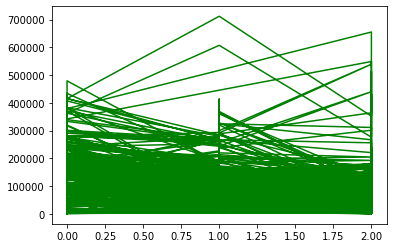

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.plot(final["overall_lit"],final["Enr Govt1"],'g')

In [ ]:
smooth_out(final)

,Year,Statecd,distcd,Enr Govt1,Enr Govt2,Enr Govt3,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Govt9,Enr Pvt1,Enr Pvt2,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt3,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Govt9,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt4,Enr R Pvt5,Enr R Pvt6,Enr R Pvt7,Enr R Pvt9,Enr Cy C1,Enr Cy C2,Enr Cy C3,Enr Cy C4,Enr Cy C5,...,tch_sc_m7,tch_sc_f1,tch_sc_f2,tch_sc_f3,tch_sc_f4,tch_sc_f5,tch_sc_f6,tch_sc_f7,tch_st_m1,tch_st_m2,tch_st_m3,tch_st_m4,tch_st_m5,tch_st_m6,tch_st_m7,tch_st_f1,tch_st_f2,tch_st_f3,tch_st_f4,tch_st_f5,tch_st_f6,tch_st_f7,trn_tch_m1,trn_tch_m2,trn_tch_m3,trn_tch_m4,trn_tch_m5,trn_tch_m6,trn_tch_m7,trn_tch_f1,trn_tch_f2,trn_tch_f3,trn_tch_f4,trn_tch_f5,trn_tch_f6,trn_tch_f7,prof_trn_tch_r,prof_trn_tch_p,days_nontch,tch_nontch
0,1.0,35.0,3501.0,3232.000000,3359.0,10620.0,0.000000,1027.000000,3739.000000,0.000000,0.0,2058.0,1994.0,5408.0,0.0,0.0000,1153.0,0.0,0.0,1788.000000,3030.0,4236.000000,0.000000,169.000000,1750.000000,0.000000,0.0,1193.0,1113.0,2206.0,0.0,0.0,846.0,0.0,0.0,4061.000000,3914.000000,3936.000000,4047.000000,4073.000000,...,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.000000,4.000000,3.0,16.0,0.0,0.000000,8.000000,0.000000,11.0,5.0,18.0,0.0,1.000000,11.000000,0.000000,69.000000,97.0,64.0,0.0,14.00000,66.0,0.000000,134.00000,176.0,135.0,0.0,22.00000,103.0,0.000000,2968.00000,228.0,12.0,519.000000
1,1.0,35.0,3503.0,3996.000000,3808.0,1162.0,1043.000000,1397.000000,1625.000000,0.000000,0.0,779.0,295.0,5576.0,0.0,0.0000,225.0,0.0,0.0,3996.000000,3808.0,1162.000000,1043.000000,1397.000000,1625.000000,0.000000,0.0,779.0,295.0,0.0,0.0,0.0,225.0,0.0,0.0,1742.000000,1954.000000,1890.000000,1920.000000,1957.000000,...,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,6.0,2.0,7.000000,0.000000,0.000000,2.0,2.0,3.0,0.0,4.000000,2.000000,0.000000,126.000000,79.0,32.0,8.0,45.00000,37.0,0.000000,84.00000,85.0,40.0,3.0,28.00000,60.0,0.000000,1249.00000,203.0,8.0,362.000000
2,1.0,35.0,3502.0,1510.000000,886.0,357.0,0.000000,651.000000,838.000000,0.000000,0.0,16.0,14800.0,5576.0,0.0,369.0000,4502.0,346.0,0.0,1510.000000,886.0,357.000000,1638.000000,651.000000,838.000000,0.000000,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,625.000000,618.000000,488.000000,532.000000,476.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,33.000000,29.0,18.0,0.0,27.000000,27.000000,0.000000,53.0,32.0,16.0,0.0,28.000000,40.000000,0.000000,36.000000,25.0,18.0,0.0,22.00000,31.0,0.000000,58.00000,29.0,23.0,0.0,17.00000,46.0,0.000000,430.00000,78.0,20.0,28.000000
3,1.0,28.0,2801.0,135664.000000,53374.0,1266.0,0.000000,226.000000,15479.026629,32536.838222,0.0,57987.0,45282.0,0.0,0.0,0.0000,8169.0,34569.0,0.0,125503.000000,50606.0,948.000000,0.000000,0.000000,13959.977572,27671.130449,0.0,28423.0,29291.0,0.0,0.0,0.0,5026.0,14613.0,0.0,65876.000000,61660.000000,57168.000000,53878.000000,51002.000000,...,264.561775,401.000000,252.0,4.0,0.0,0.000000,37.0,182.964998,933.931368,394.0,1.0,0.0,1.000000,152.947776,142.502046,288.0,126.0,1.0,0.0,0.000000,119.743987,80.869458,1964.000000,554.0,0.0,0.0,0.00000,46.0,371.252545,830.00000,267.0,0.0,0.0,0.00000,8.0,218.521156,16419.00000,845.0,13.0,263.000000
4,1.0,28.0,2822.0,145256.000000,71562.0,6867.0,870.000000,85519.912985,325.000000,5271.000000,0.0,78173.0,50979.0,1704.0,0.0,41097.7463,507.0,6684.0,0.0,127573.000000,62797.0,5338.098095,870.000000,67790.835667,325.000000,4756.000000,0.0,34449.0,30406.0,1182.0,0.0,16744.0,198.0,1850.0,0.0,68004.000000,67460.000000,66925.000000,64828.000000,62220.000000,...,1.000000,457.000000,236.0,12.0,0.0,318.172644,1.0,4.000000,281.000000,143.0,5.0,0.0,148.876512,0.000000,3.000000,136.0,69.0,3.0,0.0,79.597248,0.000000,0.000000,2419.636811,1161.0,2.0,0.0,509.66358,0.0,10.000000,1652.00000,726.0,0.0,0.0,433.48717,0.0,3.000000,21131.18636,676.0,14.0,1185.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

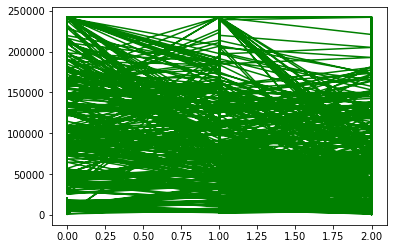

In [ ]:
plt.plot(final["overall_lit"],final["Enr Govt1"],'g')

#### Exercise 5 - (2 Marks)

Use the function below (corr_features) to identify uncorrelated features and remove the remaining features
* corr_features takes pandas dataframe, columns in the dataframe and bar (corelation co-efficient)

In [ ]:
# Function to find uncorrelated features
def corr_features(df,cols,bar=0.9):
    for c,i in enumerate(cols[:-1]):
        col_set = set(cols)
        for j in cols[c+1:]:
            if i==j:
                continue

            score = df[i].corr(df[j])

            if score>bar:
                cols = list(col_set-set([j]))
            if score<-bar:
                cols = list(col_set-set([j]))
    return cols

In [ ]:
# YOUR CODE HERE
cols=corr_features(final,final.columns)
print(len(cols))

365


In [ ]:
cols.remove('overall_lit')

In [ ]:
print(len(cols))

364


In [ ]:
final.drop(columns = cols, inplace=True)

In [ ]:
final.shape

(1268, 138)

In [ ]:
final["overall_lit"]

0       2.0
1       2.0
2       2.0
3       0.0
4       0.0
       ... 
1263    2.0
1264    1.0
1265    2.0
1266    2.0
1267    0.0
Name: overall_lit, Length: 1268, dtype: float64

#### Exercise 6 - (4 Marks)

Perform Mean Correction and Standard Scaling on the data feature/column wise.

**Hint:** In order to understand the idea behind the terms used above, you may refer the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#final = scaler.fit(final)
#final = pd.DataFrame(scaler.transform(cols),columns = cols.columns)
final.head()

,Statecd,distcd,Enr Govt1,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt6,Enr R Pvt9,Enr Cy C1,Enr Cy C2,Enr Cy C3,Enr Cy C4,Enr Cy C5,Enr Cy C6,Enr Cy C7,Sc Enrup Cy,Scg Enrp Cy,St Enrp Cy,Stg Enrp Cy,St Enrup Cy,Stg Enrup Cy,Pc Girls3,Pc Girls,Enr G C1,...,Tot Cls3,Tot Cls4,Tot Cls5,Tot Cls6,Cls Good3,Cls Good4,Cls Good5,Cls Good7,Cls Major2,Sdg 2,Sdg 7,Tlm 2,Tlm 6,Book Up B,Book Up G,Uniform P B,Attend Up B,Transport P B,Sch Un1,Electric Sch2,Electric Sch3,Smc 3,Scr 30 P,tch_govt1,tch_govt2,tch_govt3,tch_govt4,tch_govt6,tch_govt7,tch_pvt1,tch_pvt2,tch_pvt3,tch_pvt4,tch_pvt7,tch_grad3,tch_pgrad6,tch_m4,tch_m5,tch_m7,tch_f7
0,35.0,3501.0,3232.0,0.0,1027.000000,3739.000000,0.000000,5408.0,0.0,0.0000,1153.0,0.0,0.0,1788.0,3030.0,0.0,169.000000,1750.000000,0.000000,1193.0,1113.0,2206.0,846.0,0.0,4061.0,3914.0,3936.0,4047.0,4073.0,4084.0,4261.0,0.0,0.0,574.000000,272.000000,327.0,159.0,7816.0,15796.0,1931.0,...,431.0,0.0,28.000000,205.0,371.0,0.0,29.000000,0.000000,13.0,100.00,0.00,96.15,79.207492,4355.0,4142.0,1758.0,5.0,0.000000,0.0,34.000000,27.0,17.0,30.0,329.0,429.0,978.210897,0.0,432.00000,0.000000,308.0,117.0,317.0,0.0,0.000000,475.0,112.0,0.0,62.000000,0.000000,0.00000
1,35.0,3503.0,3996.0,1043.0,1397.000000,1625.000000,0.000000,5576.0,0.0,0.0000,225.0,0.0,0.0,3996.0,3808.0,1043.0,1397.000000,1625.000000,0.000000,779.0,295.0,0.0,225.0,0.0,1742.0,1954.0,1890.0,1920.0,1957.0,2016.0,2054.0,0.0,0.0,88.000000,42.000000,55.0,23.0,601.0,7058.0,864.0,...,64.0,36.0,57.000000,92.0,50.0,31.0,39.000000,0.000000,46.0,86.21,0.00,89.66,79.207492,2858.0,2678.0,2024.0,0.0,0.000000,0.0,29.000000,5.0,5.0,6.0,305.0,285.0,194.000000,95.0,175.00000,0.000000,103.0,31.0,0.0,0.0,0.000000,56.0,40.0,56.0,142.000000,0.000000,0.00000
2,35.0,3502.0,1510.0,0.0,651.000000,838.000000,0.000000,5576.0,0.0,369.0000,4502.0,346.0,0.0,1510.0,886.0,1638.0,651.000000,838.000000,0.000000,16.0,0.0,0.0,0.0,0.0,625.0,618.0,488.0,532.0,476.0,509.0,479.0,0.0,0.0,1956.000000,943.000000,1068.0,518.0,173.0,2069.0,308.0,...,15.0,0.0,26.000000,55.0,13.0,0.0,32.000000,0.000000,7.0,90.91,0.00,90.91,79.207492,867.0,827.0,917.0,501.0,0.000000,0.0,9.000000,3.0,3.0,3.0,110.0,95.0,56.000000,0.0,114.00000,0.000000,8.0,0.0,0.0,0.0,0.000000,13.0,6.0,0.0,65.000000,0.000000,0.00000
3,28.0,2801.0,135664.0,0.0,226.000000,15479.026629,32536.838222,0.0,0.0,0.0000,8169.0,34569.0,0.0,125503.0,50606.0,0.0,0.000000,13959.977572,27671.130449,28423.0,29291.0,0.0,5026.0,0.0,65876.0,61660.0,57168.0,53878.0,51002.0,46915.0,46803.0,26908.0,23827.0,78130.388431,37587.762866,27349.0,13470.0,946.0,208709.0,31357.0,...,44.0,0.0,6.000000,853.0,26.0,0.0,6.000000,1817.798053,254.0,97.52,83.18,91.87,56.700000,38187.0,42708.0,4027.0,1196.0,1133.799463,64.0,656.000000,4.0,0.0,1113.0,4749.0,1788.0,38.000000,0.0,609.09445,1968.402077,2004.0,2298.0,0.0,0.0,2111.240981,0.0,361.0,0.0,16.000000,1999.365604,1532.48651
4,28.0,2822.0,145256.0,870.0,85519.912985,325.000000,5271.000000,1704.0,0.0,41097.7463,507.0,6684.0,0.0,127573.0,62797.0,870.0,67790.835667,325.000000,4756.000000,34449.0,30406.0,1182.0,198.0,0.0,68004.0,67460.0,66925.0,64828.0,62220.0,61206.0,60548.0,30261.0,28068.0,16830.000000,7819.000000,8161.0,4020.0,4229.0,247979.0,32420.0,...,295.0,32.0,2346.871429,15.0,267.0,23.0,2013.551711,393.000000,364.0,98.93,31.37,98.02,0.000000,51412.0,57824.0,5214.0,356.0,489.000000,37.0,714.883964,29.0,10.0,883.0,5797.0,2879.0,209.000000,8.0,2.00000,52.000000,2063.0,2184.0,106.0,0.0,41.000000,87.0,0.0,7.0,2658.977499,37.000000,33.00000


#### Exercise 7 - (2 Marks)

Apply different classifiers on the preprocessed data and figure out which classifier gives the best result.

In [ ]:
from sklearn import linear_model

In [ ]:
def callKnn(data,targets):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.33)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    predicted_labels = neigh.predict(X_test)
    return accuracy_score(y_test,predicted_labels)

In [ ]:
def linearClassifier(data,targets):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.33)
    linear_classifier = linear_model.SGDClassifier(loss="log", penalty="l1")
    linear_classifier.fit(X_train,y_train)
    predicted_labels = linear_classifier.predict(X_test)
    return accuracy_score(y_test,predicted_labels)

In [ ]:
def logisticRegression(data,targets):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.4)
    #linear_classifier = linear_model.SGDClassifier()
    linear_classifier = linear_model.LogisticRegression(intercept_scaling=1)
    linear_classifier.fit(X_train,y_train)
    predicted_labels = linear_classifier.predict(X_test)
    return accuracy_score(y_test,predicted_labels)

In [ ]:
# YOUR CODE HER
target = final['overall_lit']
target = target.astype(int)

In [ ]:
score = callKnn(final,target)
print(score)

0.6692913385826772


In [ ]:
score = linearClassifier(final,target)
print(score)

0.5894988066825776


In [ ]:
score = logisticRegression(final,target)
print(score)

0.6751968503937008


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# decisions tree algorithm
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(final, target, test_size=0.3)

# Training or fitting the model with the train data
decision_tree.fit(final,target)

# Testing the trained model
decision_tree.fit(final,target)

# Calculating the score
decision_tree.score(X_test,y_test)

1.0

In [ ]:
def Dtree(data,targets):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.33)
    decision_tree = DecisionTreeClassifier(random_state=22)
    decision_tree.fit(X_train,y_train)
    predicted_labels = decision_tree.predict(X_test)
    return accuracy_score(y_test,predicted_labels)

In [ ]:
score = Dtree(final,target)
print(score)

1.0


In [ ]:
final1 = final.drop(columns=['Statecd', 'distcd','overall_lit'])
final1

,Enr Govt1,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt6,Enr R Pvt9,Enr Cy C1,Enr Cy C2,Enr Cy C3,Enr Cy C4,Enr Cy C5,Enr Cy C6,Enr Cy C7,Sc Enrup Cy,Scg Enrp Cy,St Enrp Cy,Stg Enrp Cy,St Enrup Cy,Stg Enrup Cy,Pc Girls3,Pc Girls,Enr G C1,Enr G C2,Enr G C4,...,Tot Cls3,Tot Cls4,Tot Cls5,Tot Cls6,Cls Good3,Cls Good4,Cls Good5,Cls Good7,Cls Major2,Sdg 2,Sdg 7,Tlm 2,Tlm 6,Book Up B,Book Up G,Uniform P B,Attend Up B,Transport P B,Sch Un1,Electric Sch2,Electric Sch3,Smc 3,Scr 30 P,tch_govt1,tch_govt2,tch_govt3,tch_govt4,tch_govt6,tch_govt7,tch_pvt1,tch_pvt2,tch_pvt3,tch_pvt4,tch_pvt7,tch_grad3,tch_pgrad6,tch_m4,tch_m5,tch_m7,tch_f7
0,3232.000000,0.000000,1027.000000,3739.000000,0.000000,5408.0,0.0,0.0000,1153.0,0.0,0.0,1788.000000,3030.0,0.000000,169.000000,1750.000000,0.000000,1193.0,1113.0,2206.0,846.0,0.0,4061.000000,3914.000000,3936.000000,4047.000000,4073.000000,4084.000000,4261.00000,0.000000,0.000000,574.000000,272.000000,327.0,159.0,7816.0,15796.000000,1931.000000,1905.000000,1967.000000,...,431.0,0.0,28.000000,205.0,371.0,0.0,29.000000,0.000000,13.0,100.000000,0.00,96.15,79.207492,4355.000000,4142.000000,1758.000000,5.0,0.000000,0.0,34.000000,27.000000,17.0,30.0,329.000000,429.0,978.210897,0.0,432.00000,0.000000,308.000000,117.0,317.0,0.0,0.000000,475.0,112.0,0.0,62.000000,0.000000,0.00000
1,3996.000000,1043.000000,1397.000000,1625.000000,0.000000,5576.0,0.0,0.0000,225.0,0.0,0.0,3996.000000,3808.0,1043.000000,1397.000000,1625.000000,0.000000,779.0,295.0,0.0,225.0,0.0,1742.000000,1954.000000,1890.000000,1920.000000,1957.000000,2016.000000,2054.00000,0.000000,0.000000,88.000000,42.000000,55.0,23.0,601.0,7058.000000,864.000000,955.000000,928.000000,...,64.0,36.0,57.000000,92.0,50.0,31.0,39.000000,0.000000,46.0,86.210000,0.00,89.66,79.207492,2858.000000,2678.000000,2024.000000,0.0,0.000000,0.0,29.000000,5.000000,5.0,6.0,305.000000,285.0,194.000000,95.0,175.00000,0.000000,103.000000,31.0,0.0,0.0,0.000000,56.0,40.0,56.0,142.000000,0.000000,0.00000
2,1510.000000,0.000000,651.000000,838.000000,0.000000,5576.0,0.0,369.0000,4502.0,346.0,0.0,1510.000000,886.0,1638.000000,651.000000,838.000000,0.000000,16.0,0.0,0.0,0.0,0.0,625.000000,618.000000,488.000000,532.000000,476.000000,509.000000,479.00000,0.000000,0.000000,1956.000000,943.000000,1068.0,518.0,173.0,2069.000000,308.000000,291.000000,257.000000,...,15.0,0.0,26.000000,55.0,13.0,0.0,32.000000,0.000000,7.0,90.910000,0.00,90.91,79.207492,867.000000,827.000000,917.000000,501.0,0.000000,0.0,9.000000,3.000000,3.0,3.0,110.000000,95.0,56.000000,0.0,114.00000,0.000000,8.000000,0.0,0.0,0.0,0.000000,13.0,6.0,0.0,65.000000,0.000000,0.00000
3,135664.000000,0.000000,226.000000,15479.026629,32536.838222,0.0,0.0,0.0000,8169.0,34569.0,0.0,125503.000000,50606.0,0.000000,0.000000,13959.977572,27671.130449,28423.0,29291.0,0.0,5026.0,0.0,65876.000000,61660.000000,57168.000000,53878.000000,51002.000000,46915.000000,46803.00000,26908.000000,23827.000000,78130.388431,37587.762866,27349.0,13470.0,946.0,208709.000000,31357.000000,29958.000000,26392.000000,...,44.0,0.0,6.000000,853.0,26.0,0.0,6.000000,1817.798053,254.0,97.520000,83.18,91.87,56.700000,38187.000000,42708.000000,4027.000000,1196.0,1133.799463,64.0,656.000000,4.000000,0.0,1113.0,4749.000000,1788.0,38.000000,0.0,609.09445,1968.402077,2004.000000,2298.0,0.0,0.0,2111.240981,0.0,361.0,0.0,16.000000,1999.365604,1532.48651
4,145256.000000,870.000000,85519.912985,325.000000,5271.000000,1704.0,0.0,41097.7463,507.0,6684.0,0.0,127573.000000,62797.0,870.000000,67790.835667,325.000000,4756.000000,34449.0,30406.0,1182.0,198.0,0.0,68004.000000,67460.000000,66925.000000,64828.000000,62220.000000,61206.000000,60548.00000,30261.000000,28068.000000,16830.000000,7819.000000,8161.0,4020.0,4229.0,247979.000000,32420.000000,32271.000000,31552.000000,...,295.0,32.0,2346.871429,15.0,267.0,23.0,2013.551711,3

In [ ]:
score = linearClassifier(final1,target)
print(score)

0.630071599045346


In [ ]:
score = Dtree(final1,target)
print(score)

0.6157517899761337


In [ ]:
score = logisticRegression(final1,target)
print(score)

0.6712598425196851


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
score = callKnn(final1,target)
print(score)

0.6085918854415274


In [ ]:

accuracy = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(final1, target, test_size=0.3)
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train, y_train)
    predicted_labels = neigh.predict(X_test)
    accuracy.append(accuracy_score(y_test,predicted_labels))



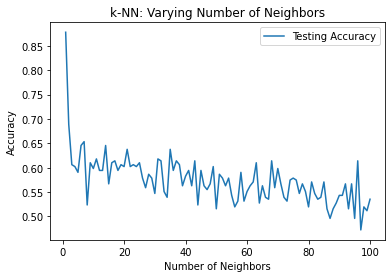

<function list.sort>

In [ ]:
import matplotlib.pyplot as plt

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,101), accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


accuracy.sort